In [ ]:
"""
Author: Anirudha Shastri,  Elio Khouri, Josef LaFranchise, Karthik Koduru
Date: 11/17/2024
CS 7180: Advanced Perception
yoloTransferLearning.ipynb
"""

In [1]:
# Check if GPU is available
!nvidia-smi

Mon Dec  9 02:08:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
| 53%   30C    P5             55W /  390W |    1818MiB /  24576MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Install UltraLytics for YOLO
!pip install ultralytics

In [3]:
#import Required Libraries
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.31  Python-3.10.15 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Setup complete  (32 CPUs, 31.8 GB RAM, 90.3/931.5 GB disk)


In [5]:
# Install Roboflow to download dataset
!pip install roboflow

In [6]:
from roboflow import Roboflow

In [7]:
# Download redzones dataset from Roboflow with the door labels
rf = Roboflow(api_key="34OpCV3nXmuAXJU7l0Hw")
project = rf.workspace("fatec2024").project("redzones")
version = project.version(7)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#NOTE: This is the path to the data.yaml file needs to be updated for your local pathh
yaml_location = 'e:/VisionAIry/YOLO/RedZones-7/data.yaml'


In [28]:
# Initialize the YOLO model
model = YOLO("yolo11n.pt")  # Specify the model architecture or path

print(model.model.yaml)

{'nc': 80, 'scales': {'n': [0.5, 0.25, 1024], 's': [0.5, 0.5, 1024], 'm': [0.5, 1.0, 512], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.5, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 2, 'C3k2', [256, False, 0.25]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 2, 'C3k2', [512, False, 0.25]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 2, 'C3k2', [1024, True]], [-1, 1, 'SPPF', [1024, 5]], [-1, 2, 'C2PSA', [1024]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, False]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 2, 'C3k2', [256, False]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 13], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, False]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 2, 'C3k2', [1024, True]], [[16, 19, 22], 1, 'Detect', ['nc']]], 'scale': 'n', 'yaml_file': 'yolo11n.yaml', 'ch': 3}


In [ ]:
# Traning the model for 60 epochs
model.train(
    data=yaml_location,  # Path to dataset configuration
    epochs=60,                             # Number of training epochs
    imgsz=640,                             # Image size for training
    device=0                               # Index of GPU to use (0 if you have only one GPU)
)


New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.31  Python-3.10.15 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=e:/VisionAIry-door/visionAIry/YOLO/RedZones-7/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning E:\VisionAIry-door\visionAIry\YOLO\RedZones-7\train\labels... 1142 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1142/1142 [00:01<00:00, 1082.49it/s]

train: New cache created: E:\VisionAIry-door\visionAIry\YOLO\RedZones-7\train\labels.cache


WARNING  Box and segment counts should be equal, but got len(segments) = 419, len(boxes) = 1432. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning E:\VisionAIry-door\visionAIry\YOLO\RedZones-7\valid\labels... 352 images, 0 backgrounds, 0 corrupt: 100%|██████████| 352/352 [00:00<00:00, 664.64it/s]

val: New cache created: E:\VisionAIry-door\visionAIry\YOLO\RedZones-7\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 130, len(boxes) = 456. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train13
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.36G      1.164      2.936      1.455         11        640: 100%|██████████| 72/72 [00:06<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]

                   all        352        456      0.293      0.314      0.294      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.39G      1.192      2.257      1.485         13        640: 100%|██████████| 72/72 [00:05<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.94it/s]

                   all        352        456      0.241      0.366      0.299      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60       2.4G      1.195      2.062      1.489         20        640: 100%|██████████| 72/72 [00:05<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.40it/s]

                   all        352        456       0.36      0.493      0.361      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.36G        1.2      1.911      1.463         17        640: 100%|██████████| 72/72 [00:05<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.69it/s]

                   all        352        456      0.404      0.458      0.364       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.37G      1.175       1.78      1.431         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.36it/s]

                   all        352        456      0.497      0.472      0.427      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.35G      1.117      1.603      1.396         11        640: 100%|██████████| 72/72 [00:05<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.76it/s]

                   all        352        456      0.473      0.497      0.474      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.35G      1.103      1.574      1.384         13        640: 100%|██████████| 72/72 [00:05<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.95it/s]

                   all        352        456      0.427      0.492      0.374      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.35G      1.058       1.42      1.352         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.79it/s]

                   all        352        456      0.736      0.638      0.748      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.35G      1.051      1.348      1.343         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.92it/s]

                   all        352        456      0.647      0.546       0.62      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.35G     0.9927      1.332      1.314         23        640: 100%|██████████| 72/72 [00:05<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.89it/s]

                   all        352        456      0.669      0.687      0.746      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.35G     0.9819      1.243      1.294         13        640: 100%|██████████| 72/72 [00:05<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.00it/s]

                   all        352        456      0.729      0.653      0.751      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.35G     0.9793      1.245      1.295         12        640: 100%|██████████| 72/72 [00:05<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.84it/s]

                   all        352        456      0.737      0.626      0.746      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.35G     0.9599       1.21      1.282         12        640: 100%|██████████| 72/72 [00:05<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.86it/s]

                   all        352        456      0.614      0.646      0.666      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.37G     0.9392      1.157      1.267         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.89it/s]

                   all        352        456      0.806       0.72      0.808       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.35G     0.9308      1.155      1.254         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.70it/s]

                   all        352        456      0.626      0.654      0.702      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.37G     0.9219      1.122      1.247         16        640: 100%|██████████| 72/72 [00:05<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.87it/s]

                   all        352        456      0.584      0.489      0.499       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.35G     0.8866      1.048       1.23         13        640: 100%|██████████| 72/72 [00:05<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.25it/s]

                   all        352        456      0.783      0.739      0.808      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.35G     0.9018       1.05       1.24         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.10it/s]

                   all        352        456      0.679      0.608      0.682      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.35G     0.8759     0.9981      1.221         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.97it/s]

                   all        352        456      0.821      0.765      0.825      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.39G     0.8453     0.9845      1.203         17        640: 100%|██████████| 72/72 [00:05<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.05it/s]

                   all        352        456      0.776      0.739      0.815      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.35G     0.8584     0.9947      1.198         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.13it/s]

                   all        352        456      0.755      0.684      0.771      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.37G     0.8514      0.977      1.198         14        640: 100%|██████████| 72/72 [00:05<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.96it/s]

                   all        352        456      0.807      0.803      0.858       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.37G     0.8217     0.9148      1.182         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.03it/s]

                   all        352        456      0.844      0.783      0.873      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.35G      0.819     0.9346      1.181         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.87it/s]

                   all        352        456      0.867      0.742      0.858      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.37G     0.8172     0.9012      1.175         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.89it/s]

                   all        352        456      0.871      0.786      0.886      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.35G     0.7957     0.8801      1.164         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.19it/s]

                   all        352        456      0.904      0.829      0.899       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.37G     0.7954     0.8295      1.159         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.05it/s]

                   all        352        456      0.852      0.805      0.883      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.35G     0.7865     0.8551      1.158         21        640: 100%|██████████| 72/72 [00:05<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.04it/s]

                   all        352        456      0.803      0.788      0.865      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.37G     0.7855     0.8224      1.152         23        640: 100%|██████████| 72/72 [00:05<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.11it/s]

                   all        352        456      0.752      0.763      0.846      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.35G     0.7837     0.8342       1.16         10        640: 100%|██████████| 72/72 [00:05<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.06it/s]

                   all        352        456      0.849      0.826      0.896      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.35G     0.7406     0.7668      1.128         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.11it/s]

                   all        352        456      0.757      0.809      0.878      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.35G     0.7649     0.7798      1.146         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.96it/s]

                   all        352        456      0.841       0.77      0.901      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.35G     0.7343     0.7723      1.127         11        640: 100%|██████████| 72/72 [00:05<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.11it/s]

                   all        352        456      0.882      0.826      0.905      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.37G     0.7304     0.7382      1.125         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.22it/s]

                   all        352        456      0.882      0.817      0.909      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.37G     0.7397     0.7438      1.125         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.21it/s]

                   all        352        456      0.889      0.877      0.936       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.35G     0.7247     0.7292      1.121         12        640: 100%|██████████| 72/72 [00:05<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.16it/s]

                   all        352        456      0.847      0.858       0.91      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.37G     0.7121     0.7209      1.115         19        640: 100%|██████████| 72/72 [00:05<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.18it/s]

                   all        352        456      0.891      0.835      0.917      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.36G      0.678     0.6709      1.096         15        640: 100%|██████████| 72/72 [00:05<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.79it/s]

                   all        352        456      0.903      0.847      0.932      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.35G     0.7004        0.7      1.103         17        640: 100%|██████████| 72/72 [00:05<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.87it/s]

                   all        352        456      0.918       0.82      0.923      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.35G     0.6752     0.6724      1.102         11        640: 100%|██████████| 72/72 [00:05<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.08it/s]

                   all        352        456        0.9      0.872      0.933      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.37G      0.679     0.6759      1.091         18        640: 100%|██████████| 72/72 [00:05<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]

                   all        352        456      0.925      0.846      0.935      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.37G     0.6861     0.6563       1.09         11        640: 100%|██████████| 72/72 [00:05<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.54it/s]

                   all        352        456      0.905      0.868      0.932      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.35G     0.6774     0.6481      1.089         21        640: 100%|██████████| 72/72 [00:05<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.22it/s]

                   all        352        456      0.899      0.892      0.944      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.37G     0.6661     0.6235      1.086         20        640: 100%|██████████| 72/72 [00:05<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.68it/s]

                   all        352        456      0.898      0.882      0.938      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.35G     0.6544     0.6265      1.078         14        640: 100%|██████████| 72/72 [00:05<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.91it/s]

                   all        352        456      0.903      0.896      0.944      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.35G     0.6371      0.595      1.075         20        640: 100%|██████████| 72/72 [00:06<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.23it/s]

                   all        352        456      0.872      0.889      0.944      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.35G     0.6476     0.6014      1.066         16        640: 100%|██████████| 72/72 [00:05<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.56it/s]

                   all        352        456      0.911      0.898      0.945      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.35G     0.6171     0.5822      1.058         21        640: 100%|██████████| 72/72 [00:05<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.75it/s]

                   all        352        456      0.926      0.896      0.947      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.37G      0.637     0.5867      1.064         17        640: 100%|██████████| 72/72 [00:05<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.07it/s]

                   all        352        456      0.936      0.886      0.953      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.37G     0.6241     0.5693      1.058         16        640: 100%|██████████| 72/72 [00:05<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.40it/s]

                   all        352        456      0.943      0.895       0.95      0.803


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.35G     0.5526     0.5127      1.065          6        640: 100%|██████████| 72/72 [00:05<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.86it/s]

                   all        352        456      0.898      0.903      0.947      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.35G     0.5265     0.4598      1.044          6        640: 100%|██████████| 72/72 [00:05<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.02it/s]

                   all        352        456       0.94      0.876      0.947      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.35G     0.5262     0.4392      1.041          7        640: 100%|██████████| 72/72 [00:05<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.84it/s]

                   all        352        456      0.917        0.9      0.952      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.35G     0.5244     0.4284      1.042          6        640: 100%|██████████| 72/72 [00:05<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.68it/s]

                   all        352        456      0.938      0.896      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.35G     0.5101     0.4192      1.029          8        640: 100%|██████████| 72/72 [00:05<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.06it/s]

                   all        352        456       0.89      0.928      0.955      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.35G     0.4897        0.4      1.008          7        640: 100%|██████████| 72/72 [00:05<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.66it/s]

                   all        352        456      0.946      0.899      0.961      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.35G     0.4802      0.398      1.012          6        640: 100%|██████████| 72/72 [00:05<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.93it/s]

                   all        352        456      0.926      0.928      0.964       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.35G     0.4825     0.3837      1.001          7        640: 100%|██████████| 72/72 [00:05<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.22it/s]

                   all        352        456      0.936      0.922      0.961      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.35G     0.4729     0.3705      1.003          7        640: 100%|██████████| 72/72 [00:05<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]

                   all        352        456      0.926      0.927      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.35G     0.4671     0.3695      1.004          7        640: 100%|██████████| 72/72 [00:05<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.11it/s]

                   all        352        456       0.94       0.92      0.962      0.826



60 epochs completed in 0.118 hours.
Optimizer stripped from runs\detect\train13\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train13\weights\best.pt, 5.5MB

Validating runs\detect\train13\weights\best.pt...
Ultralytics 8.3.31  Python-3.10.15 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.67it/s]


                   all        352        456      0.936      0.923      0.961      0.829
                  door         87        141       0.92      0.899      0.929      0.794
door1 - v2 2022-09-29 1-05pm        137        154      0.974      0.961      0.992      0.901
             undefined        128        161      0.913      0.909      0.963      0.792
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train13


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002132CB3BDC0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [10]:
# Save the model weigthts
model.save("yolo_custom_weights.pt")

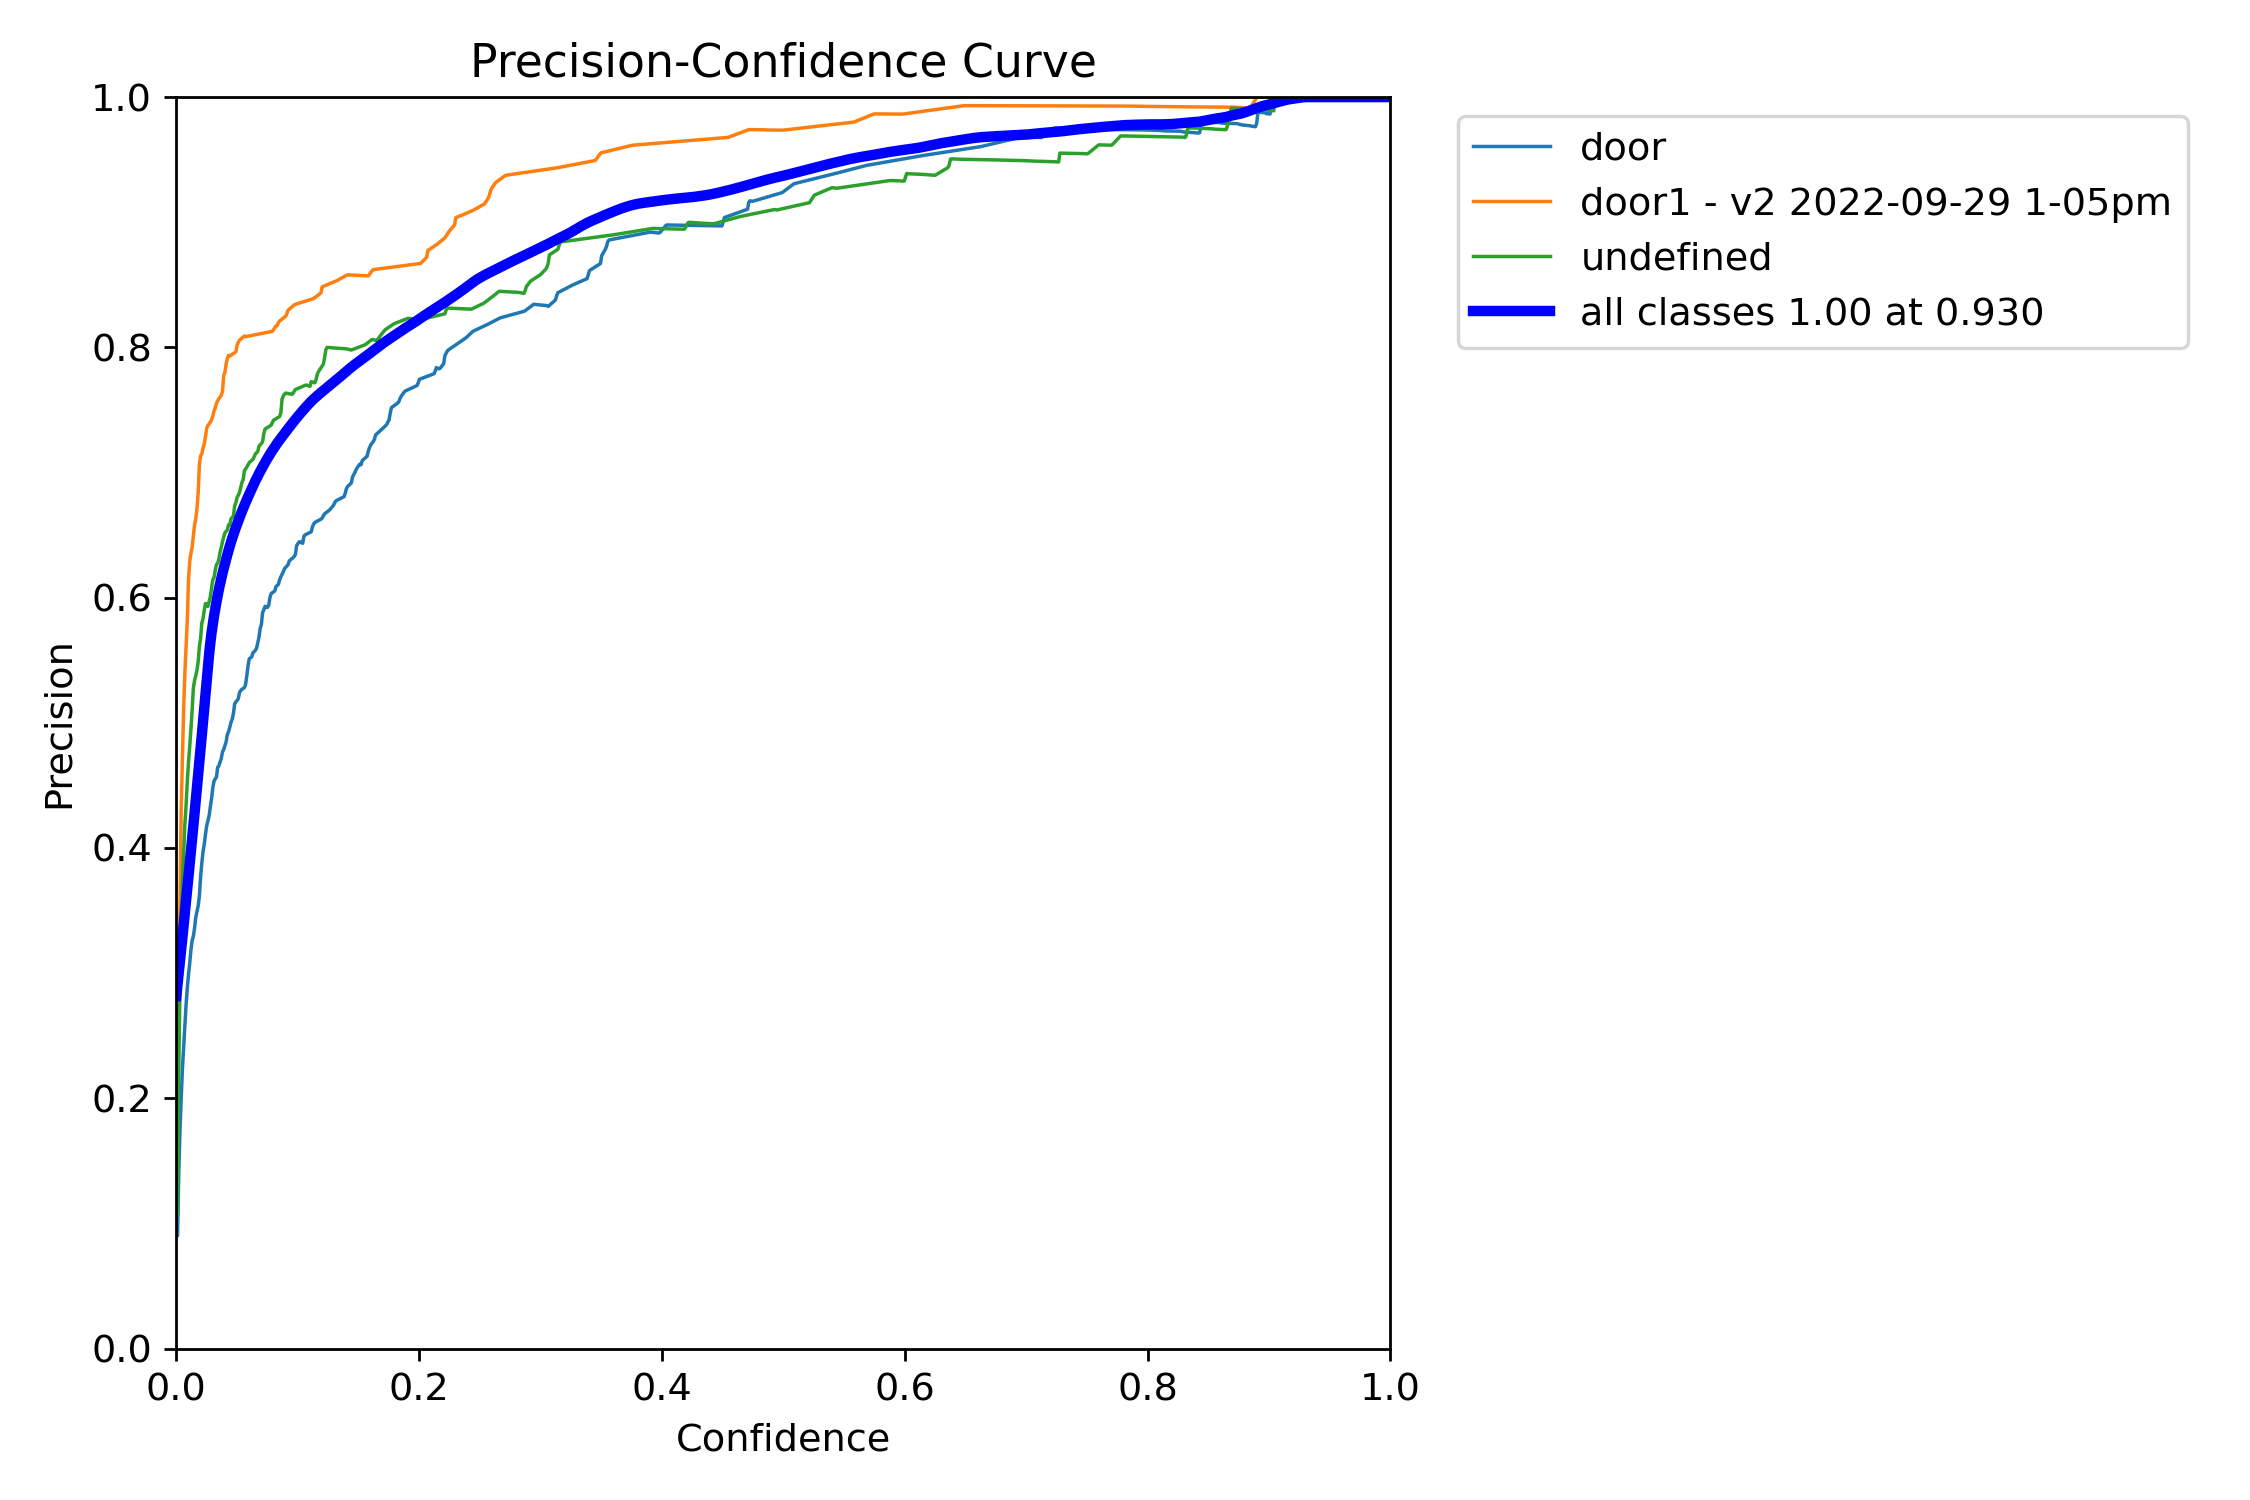

In [5]:
# Display the p_curve
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\P_curve.png", width=600)


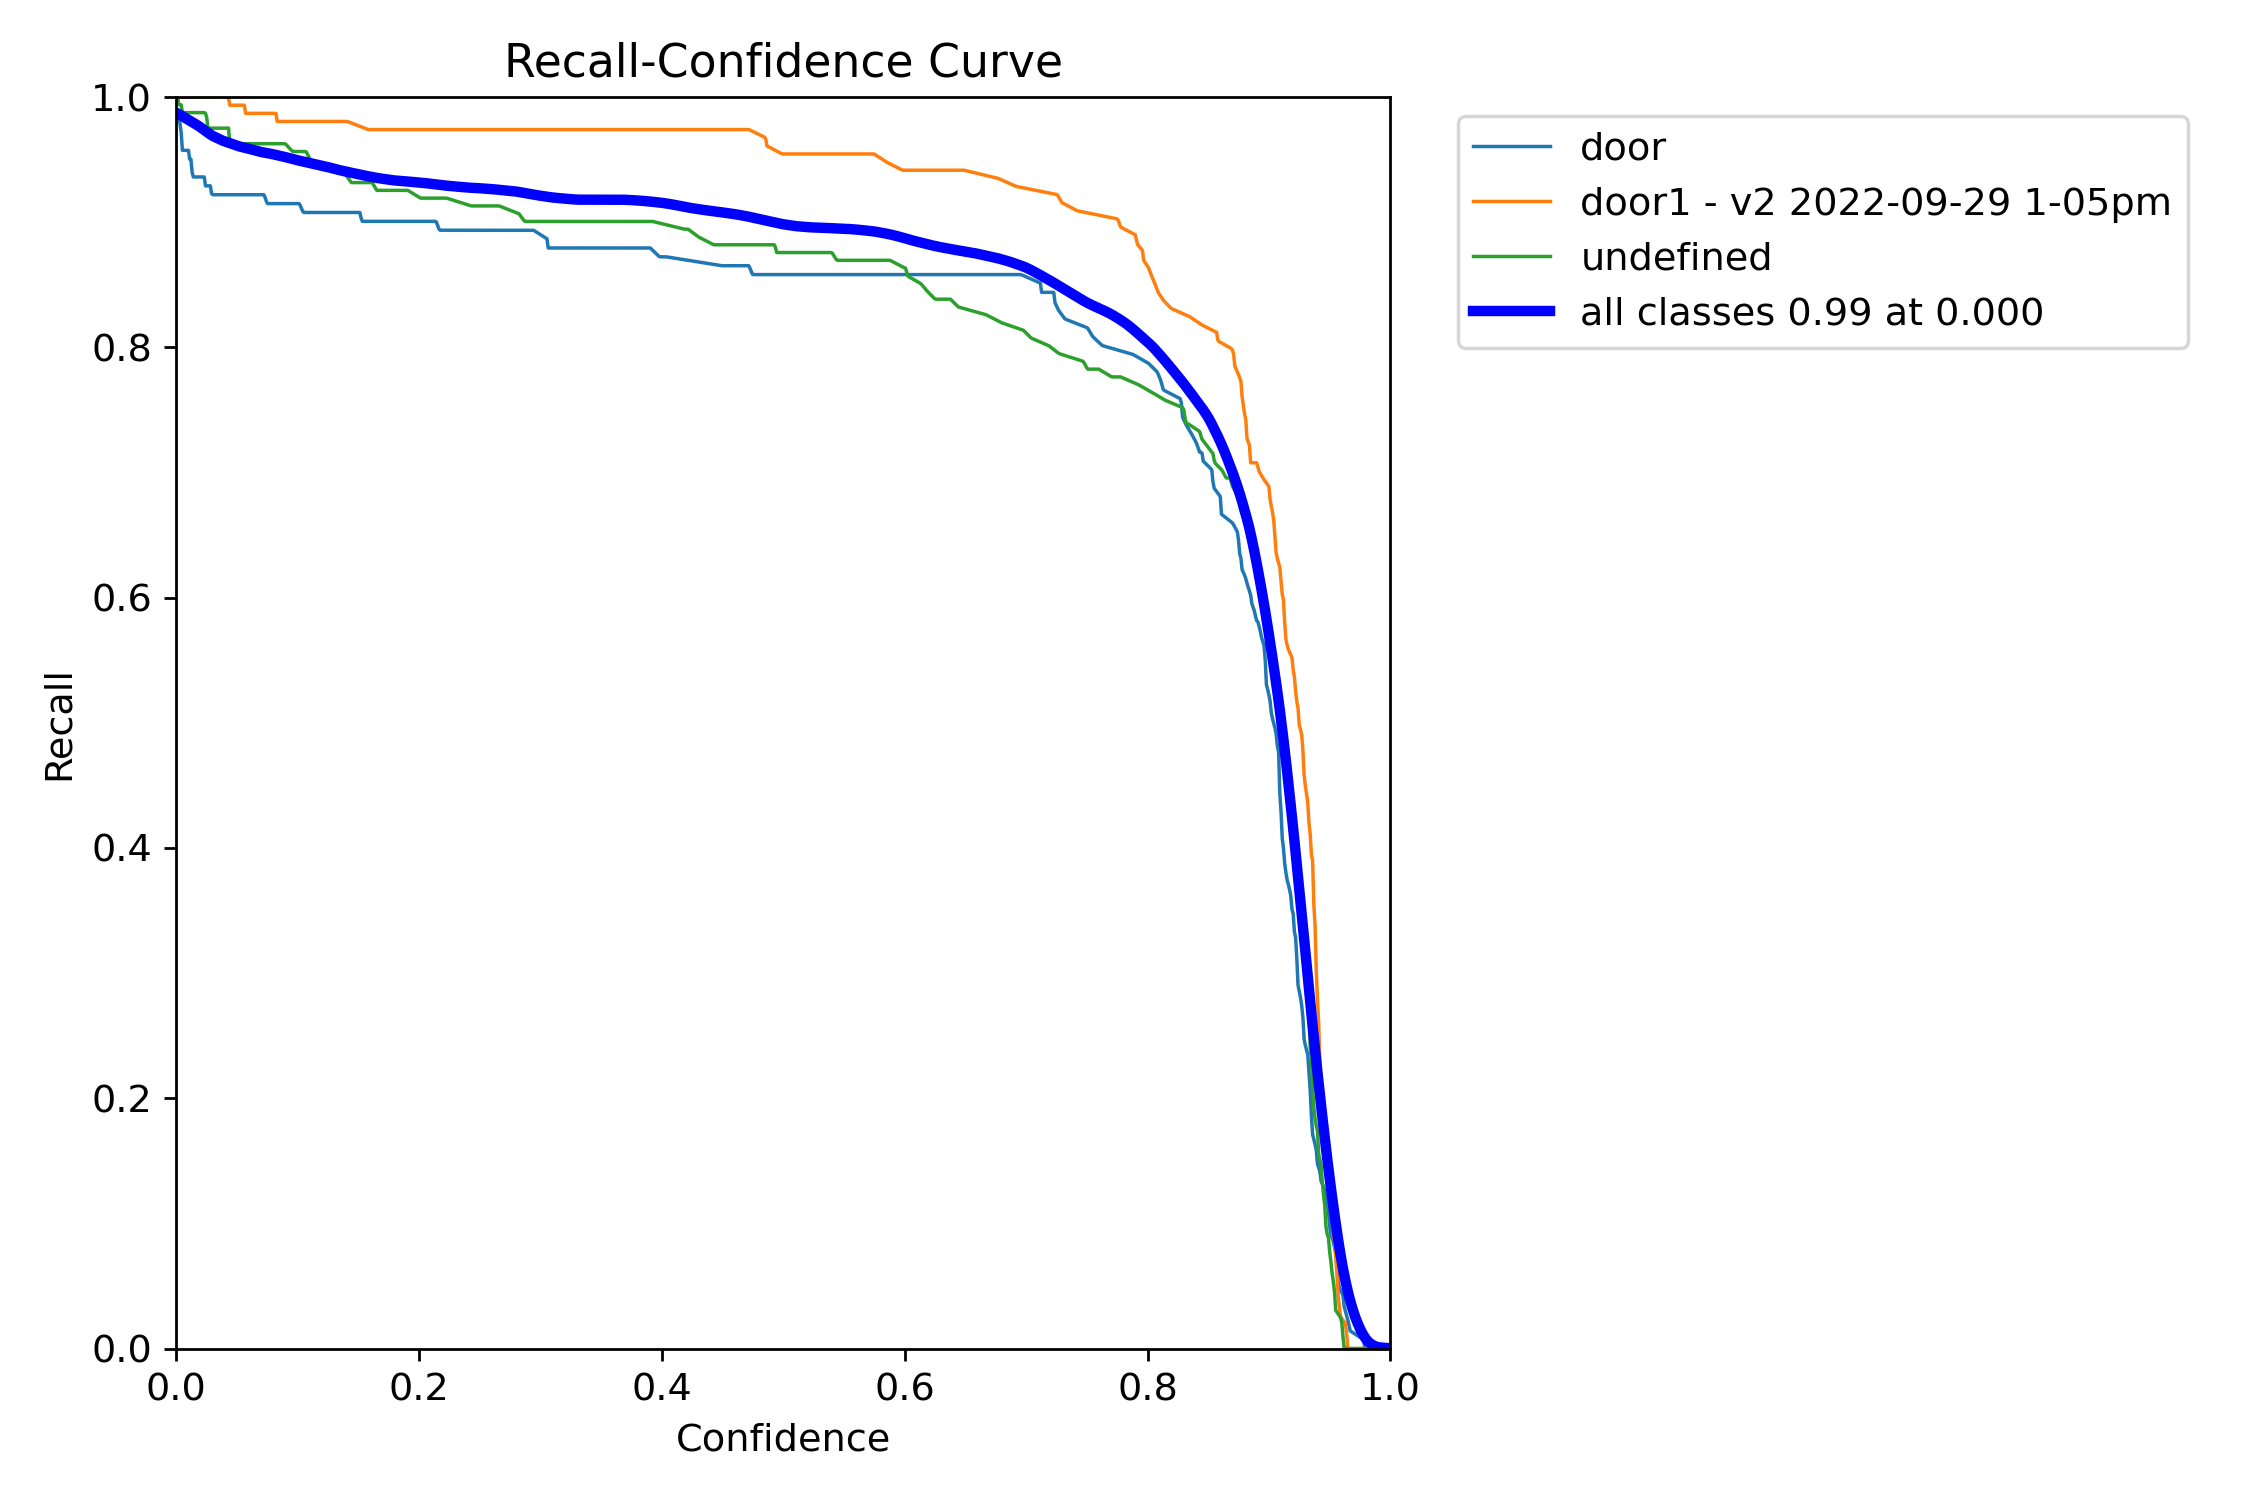

In [4]:
# Display the r_curve
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\R_curve.png", width=600)

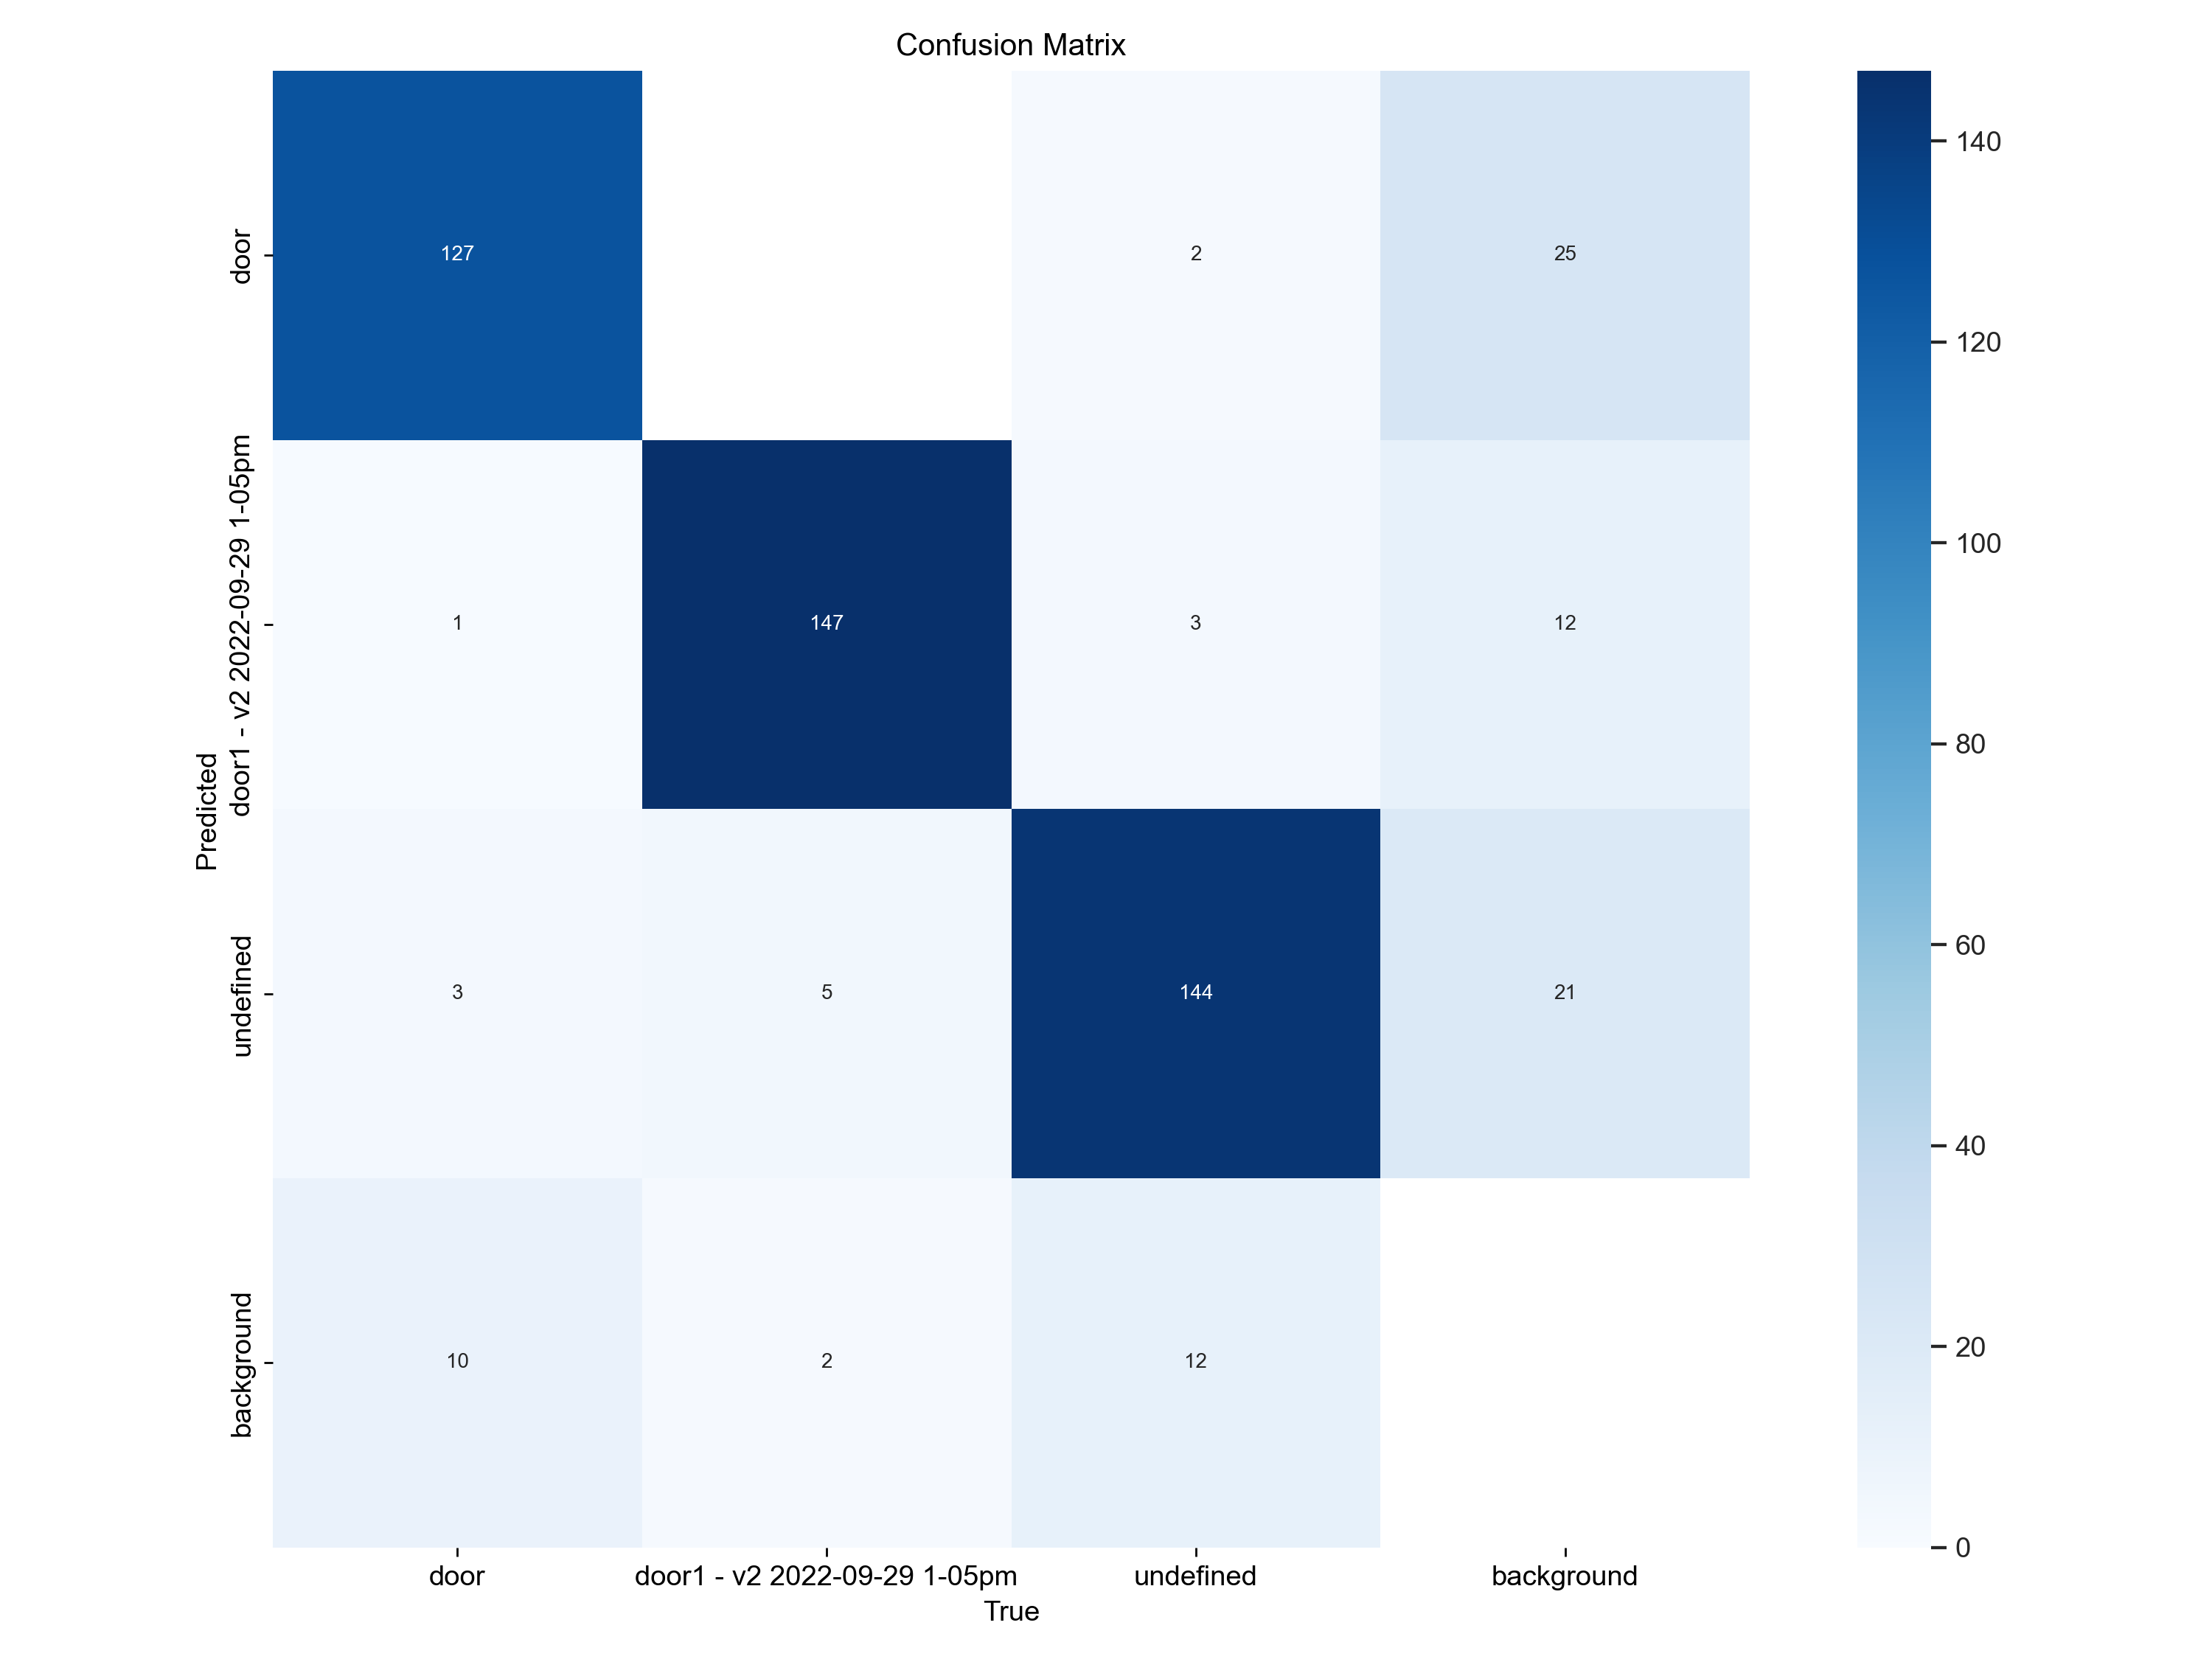

In [ ]:
# Display the confusion matrix
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\confusion_matrix.png", width=600)


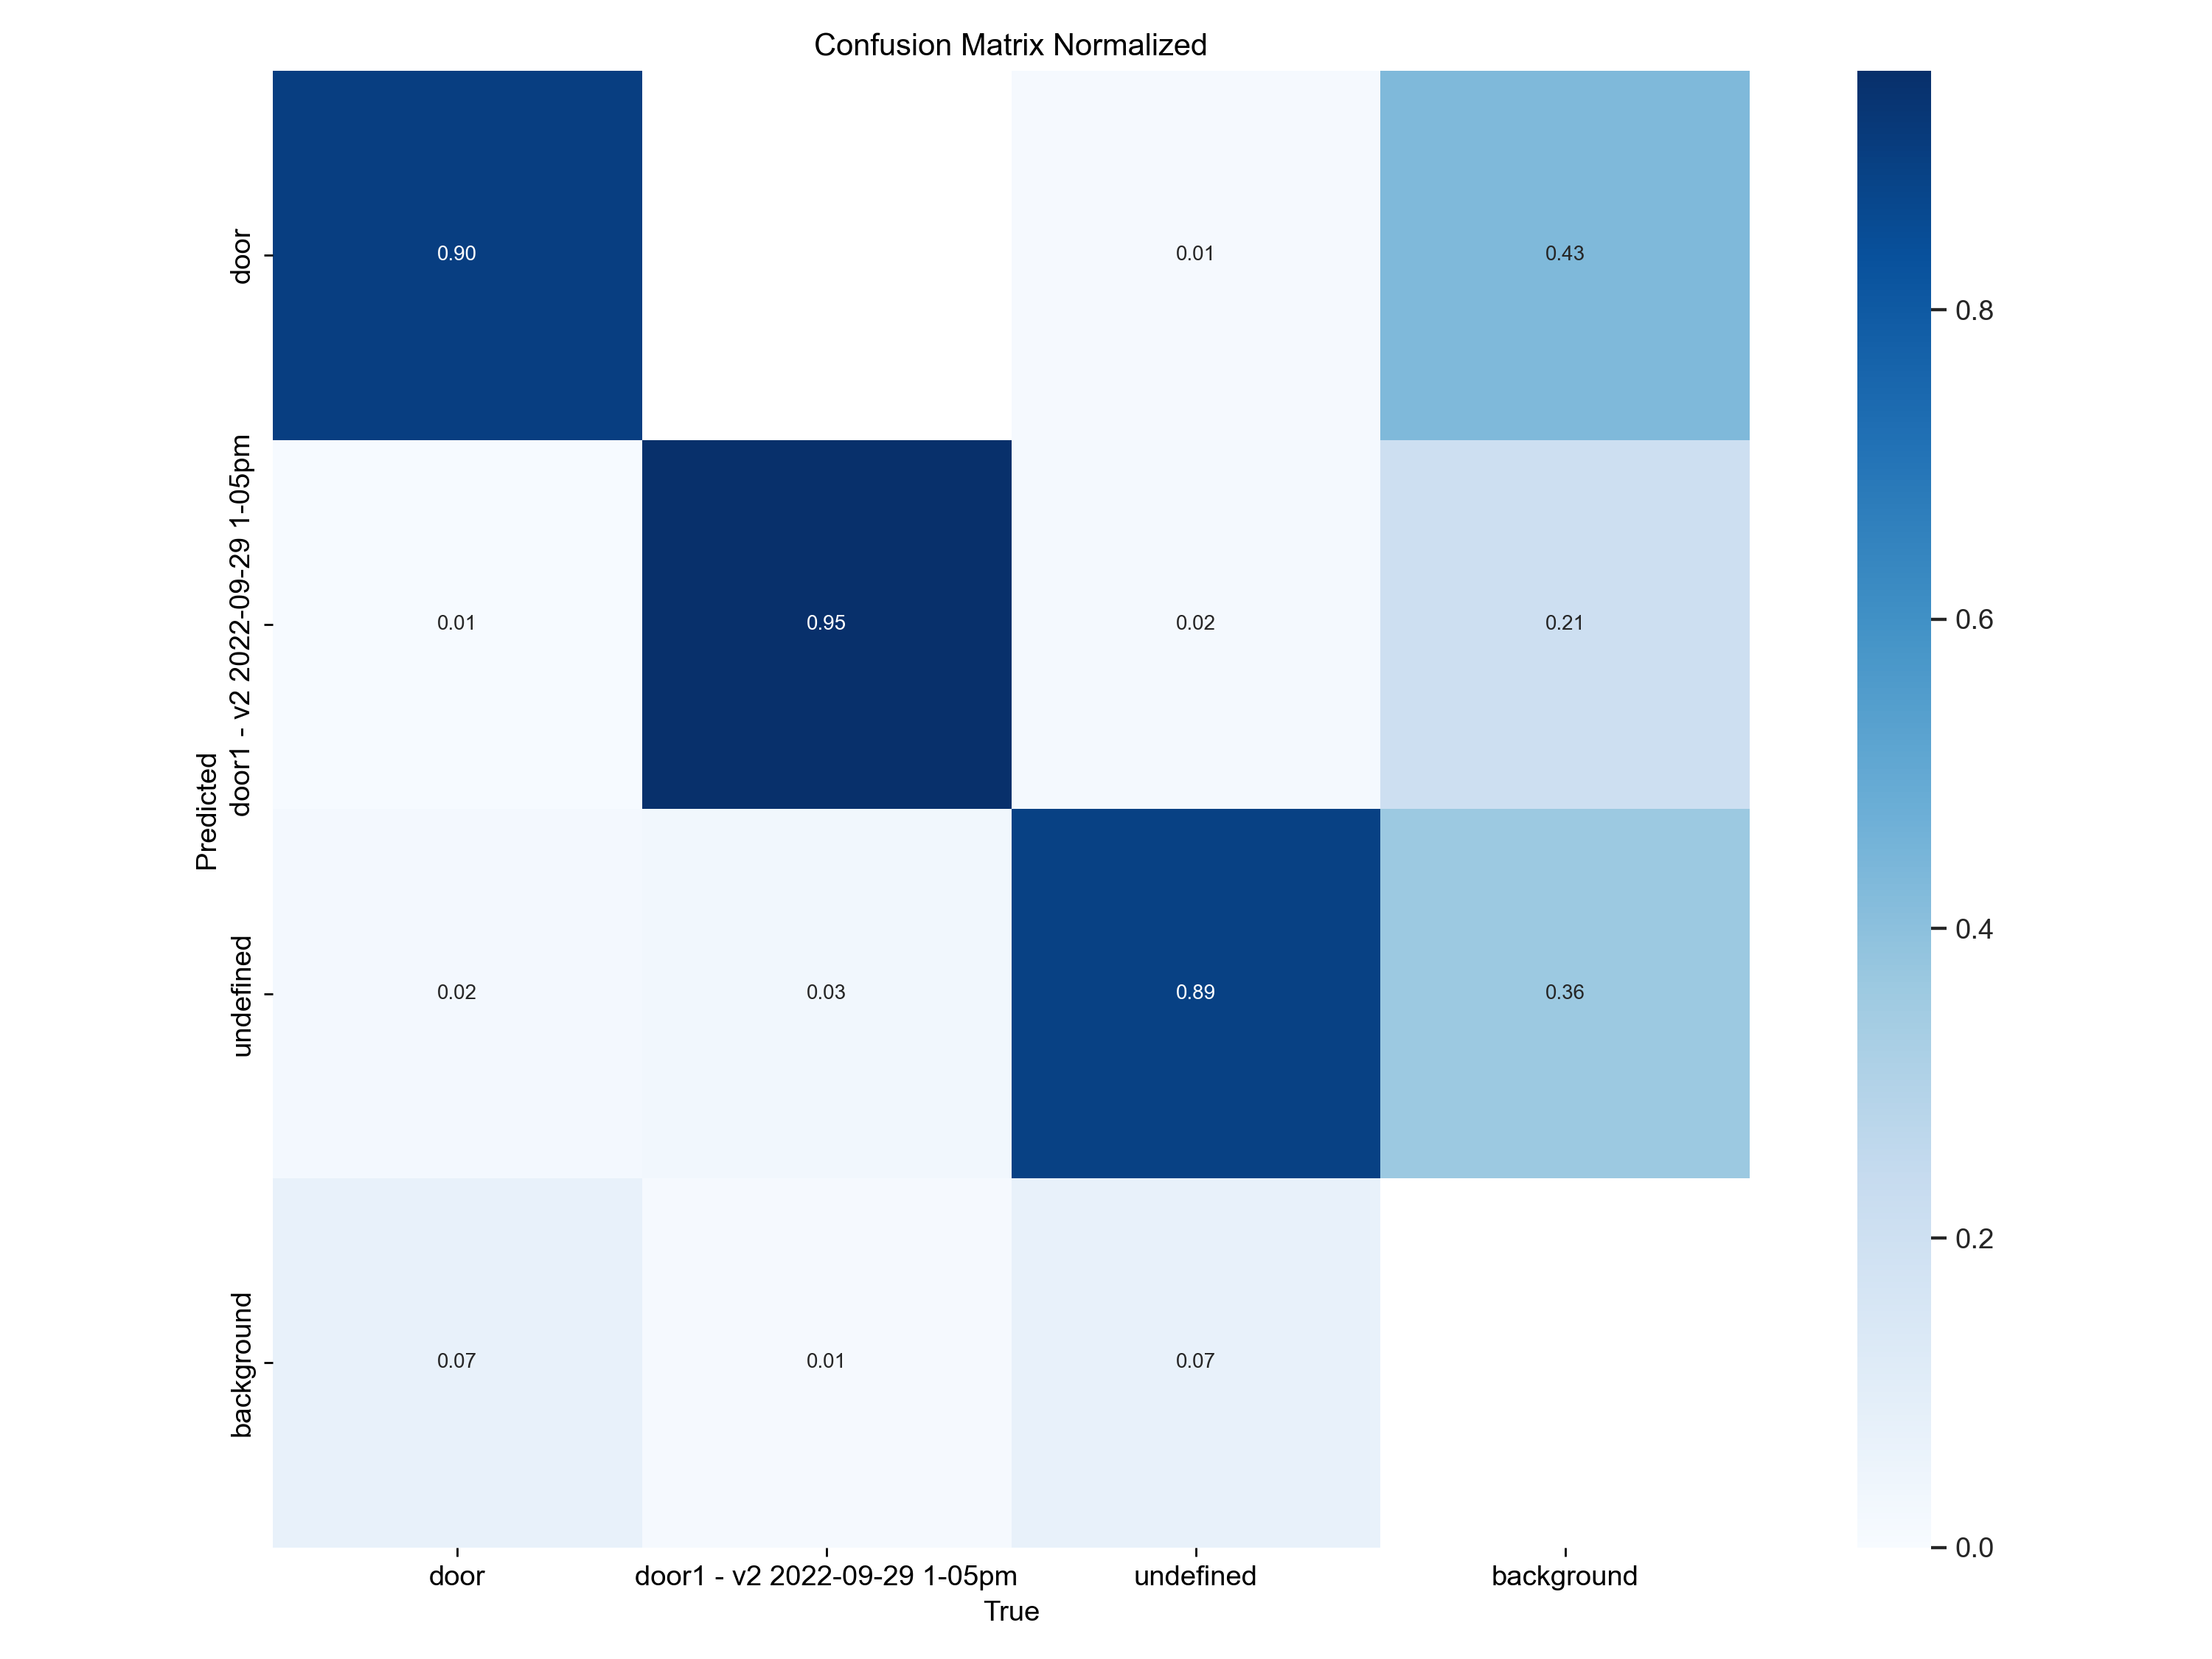

In [ ]:
# Display the normalized confusion matrix
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\confusion_matrix_normalized.png", width=600)


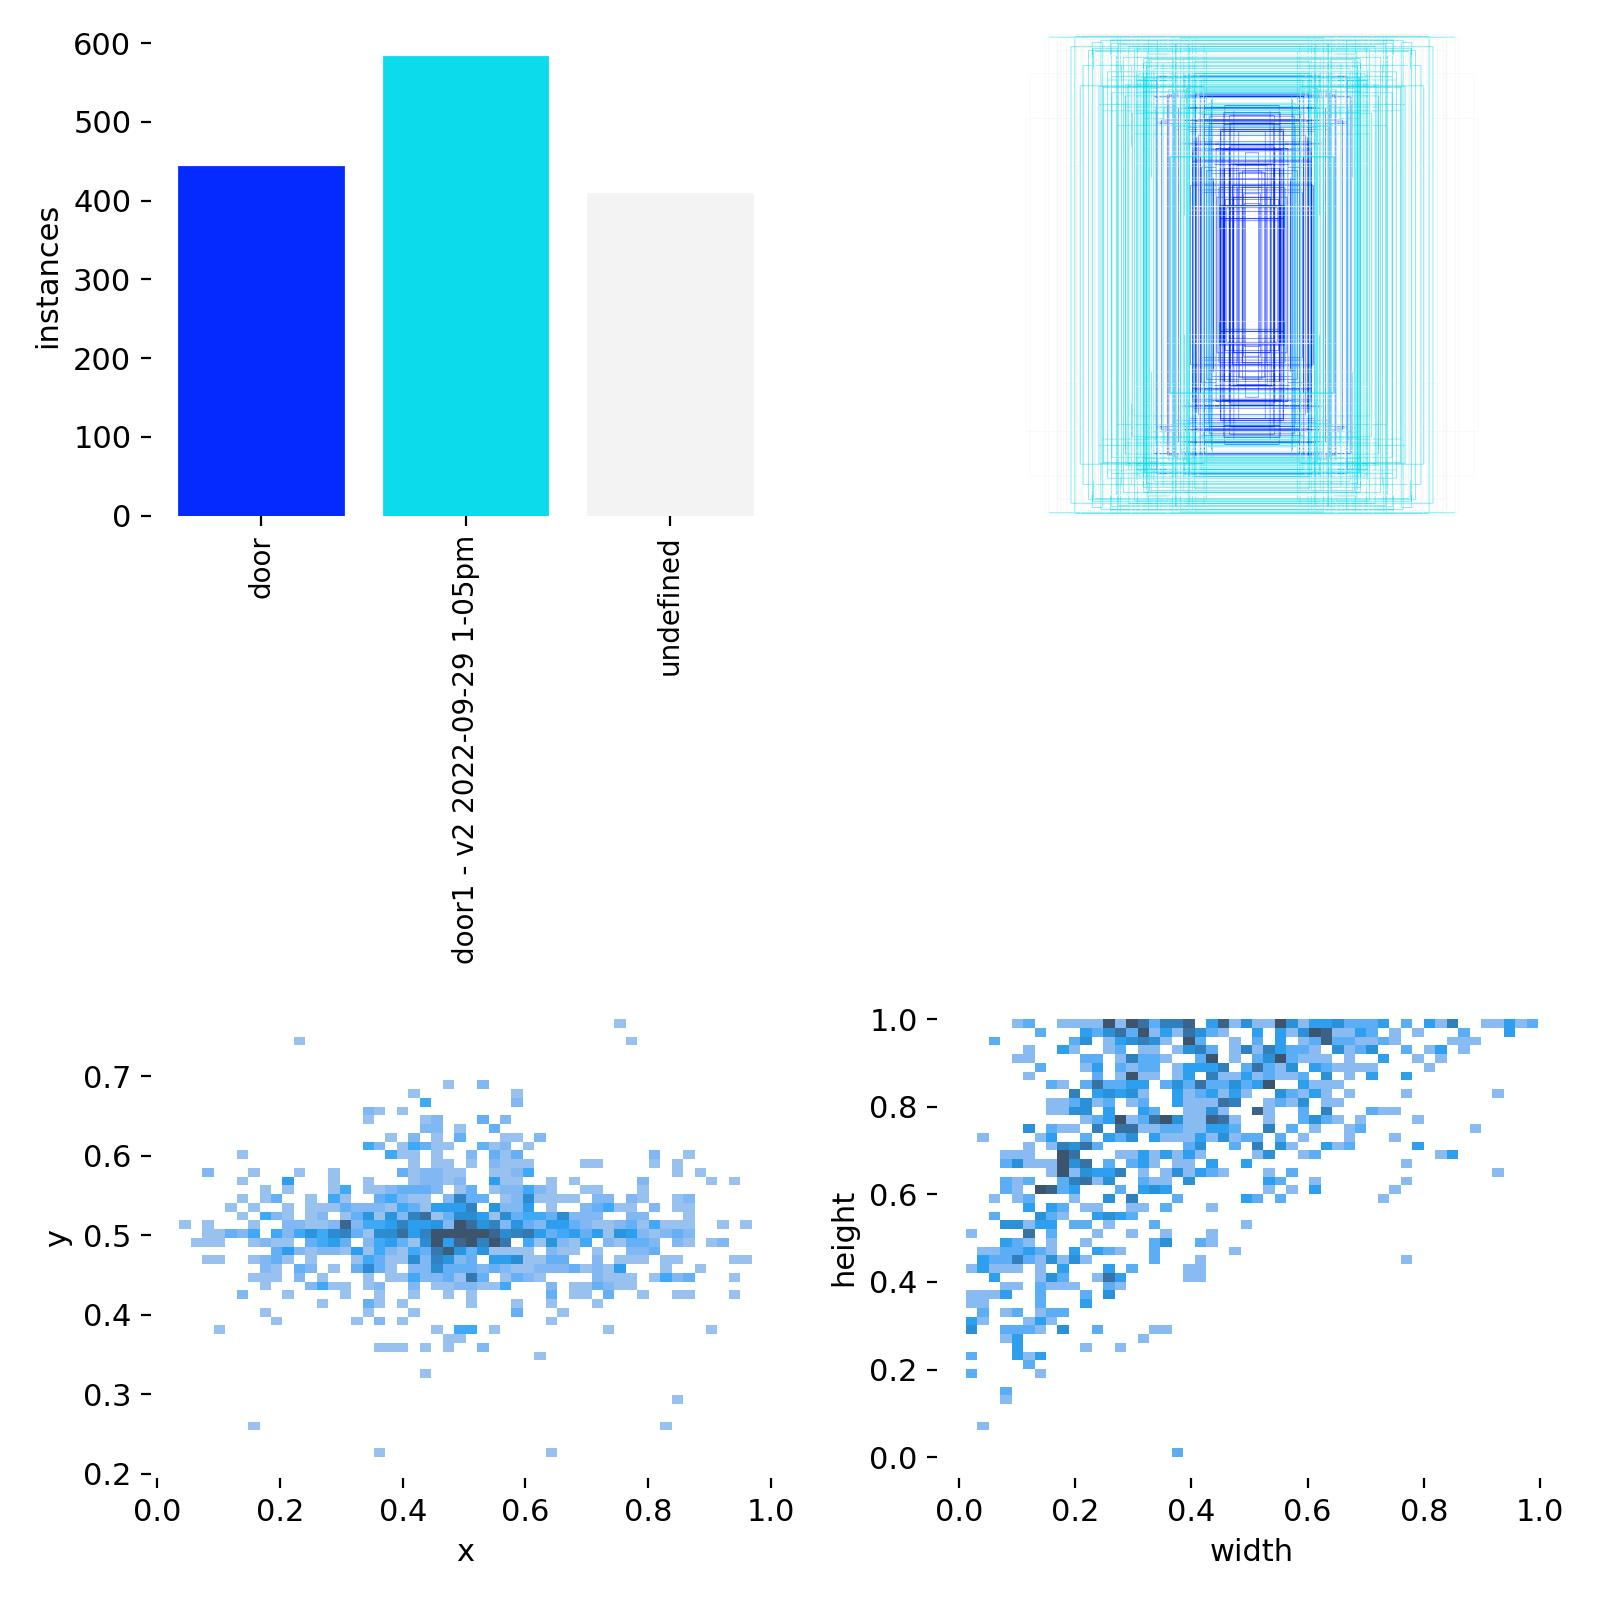

In [ ]:
# Display the labels
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\labels.jpg", width=600)


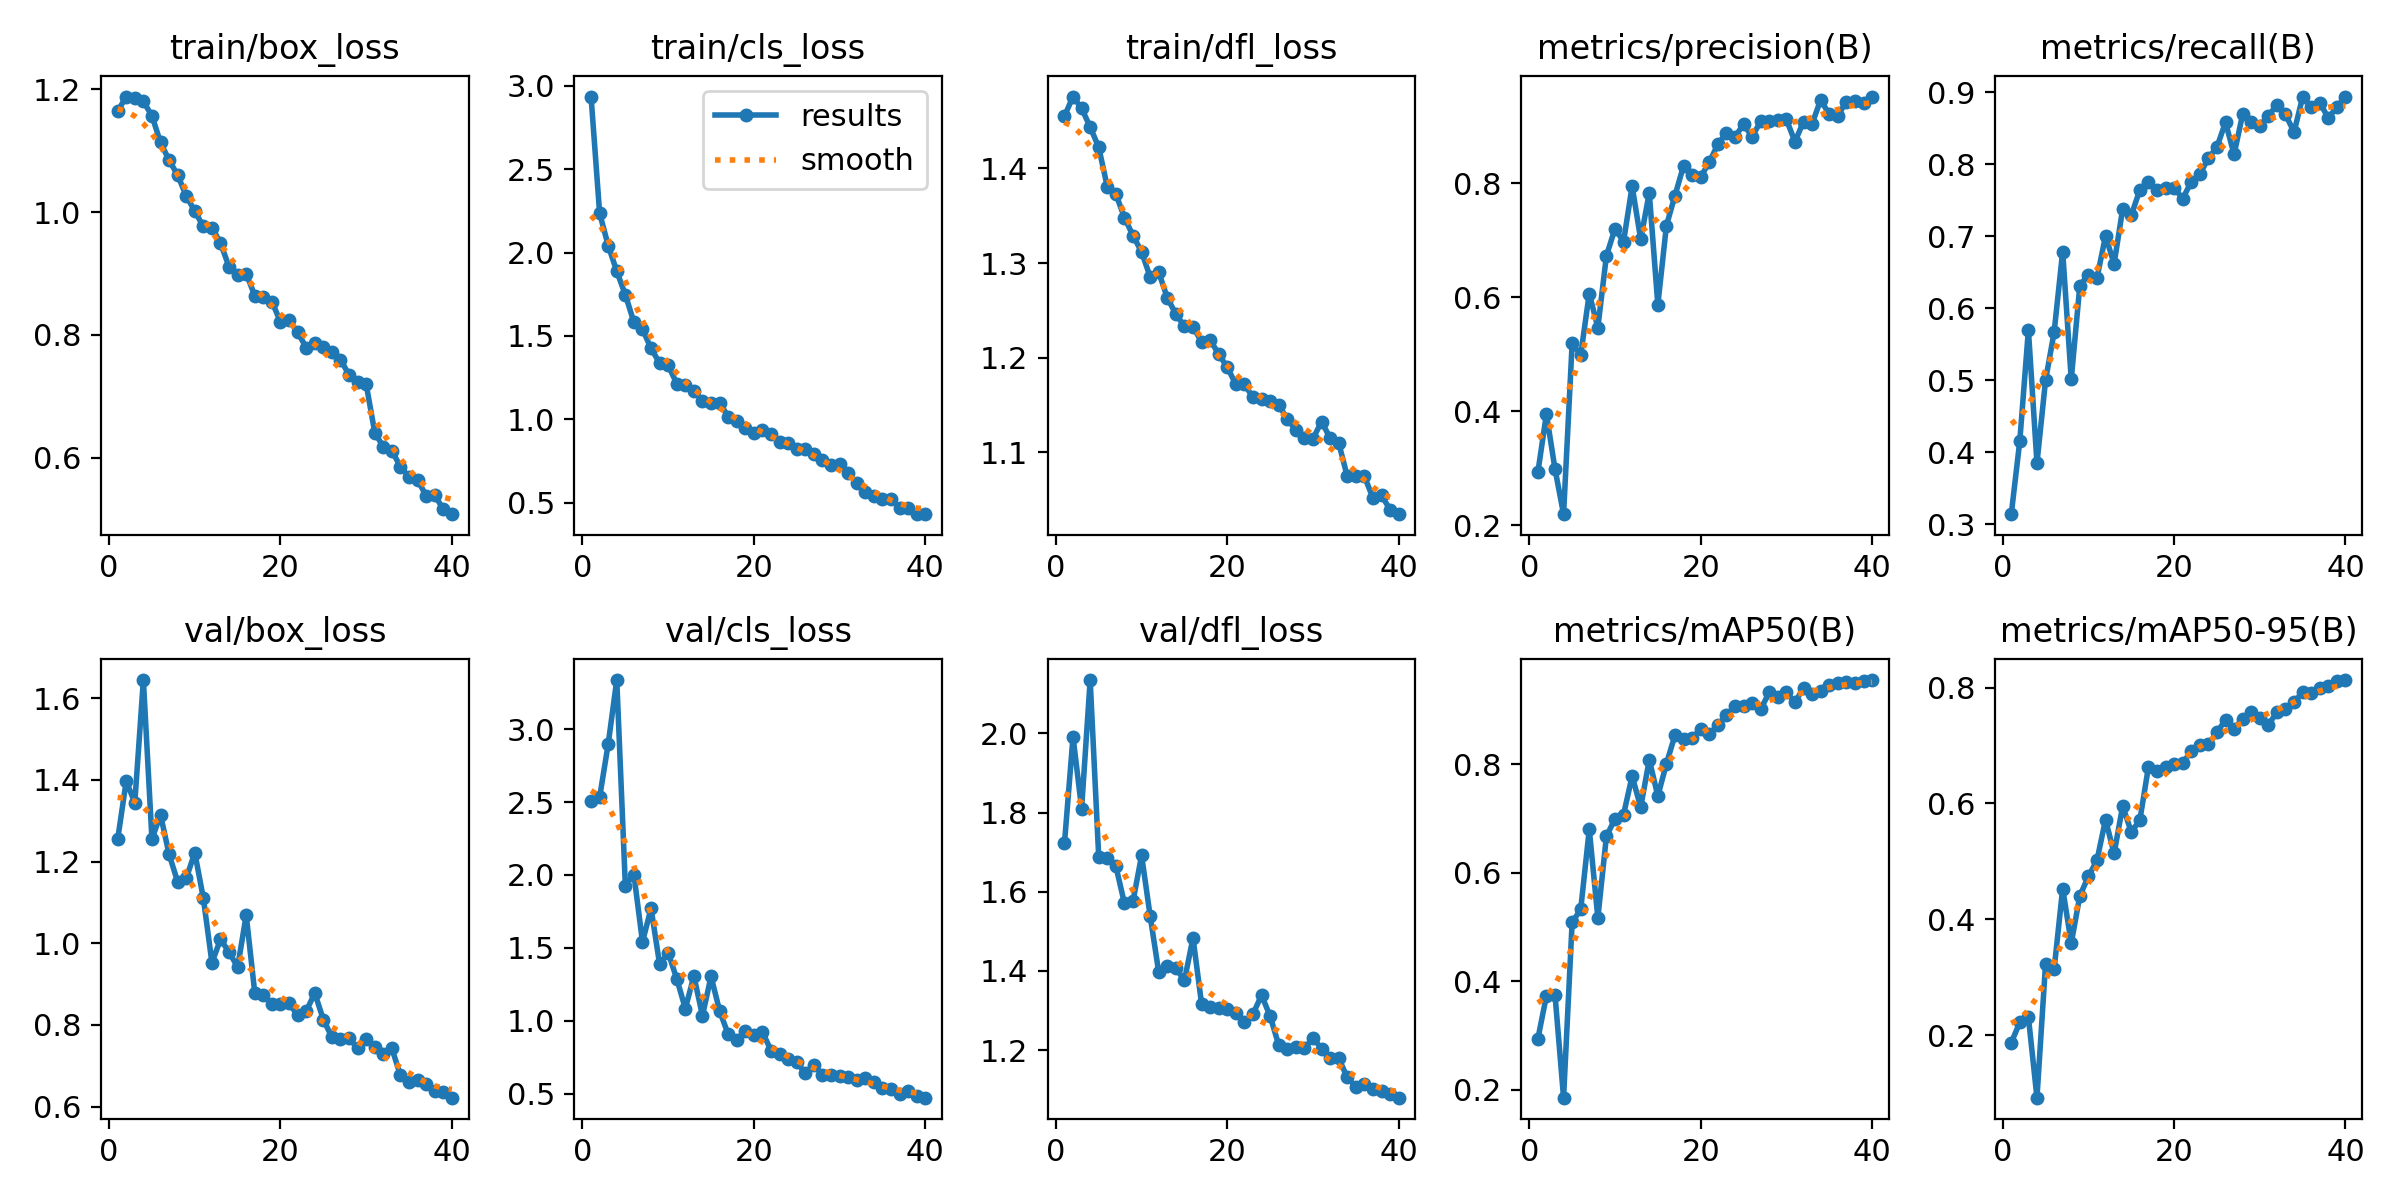

In [ ]:
# Display the results
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\results.png", width=600)


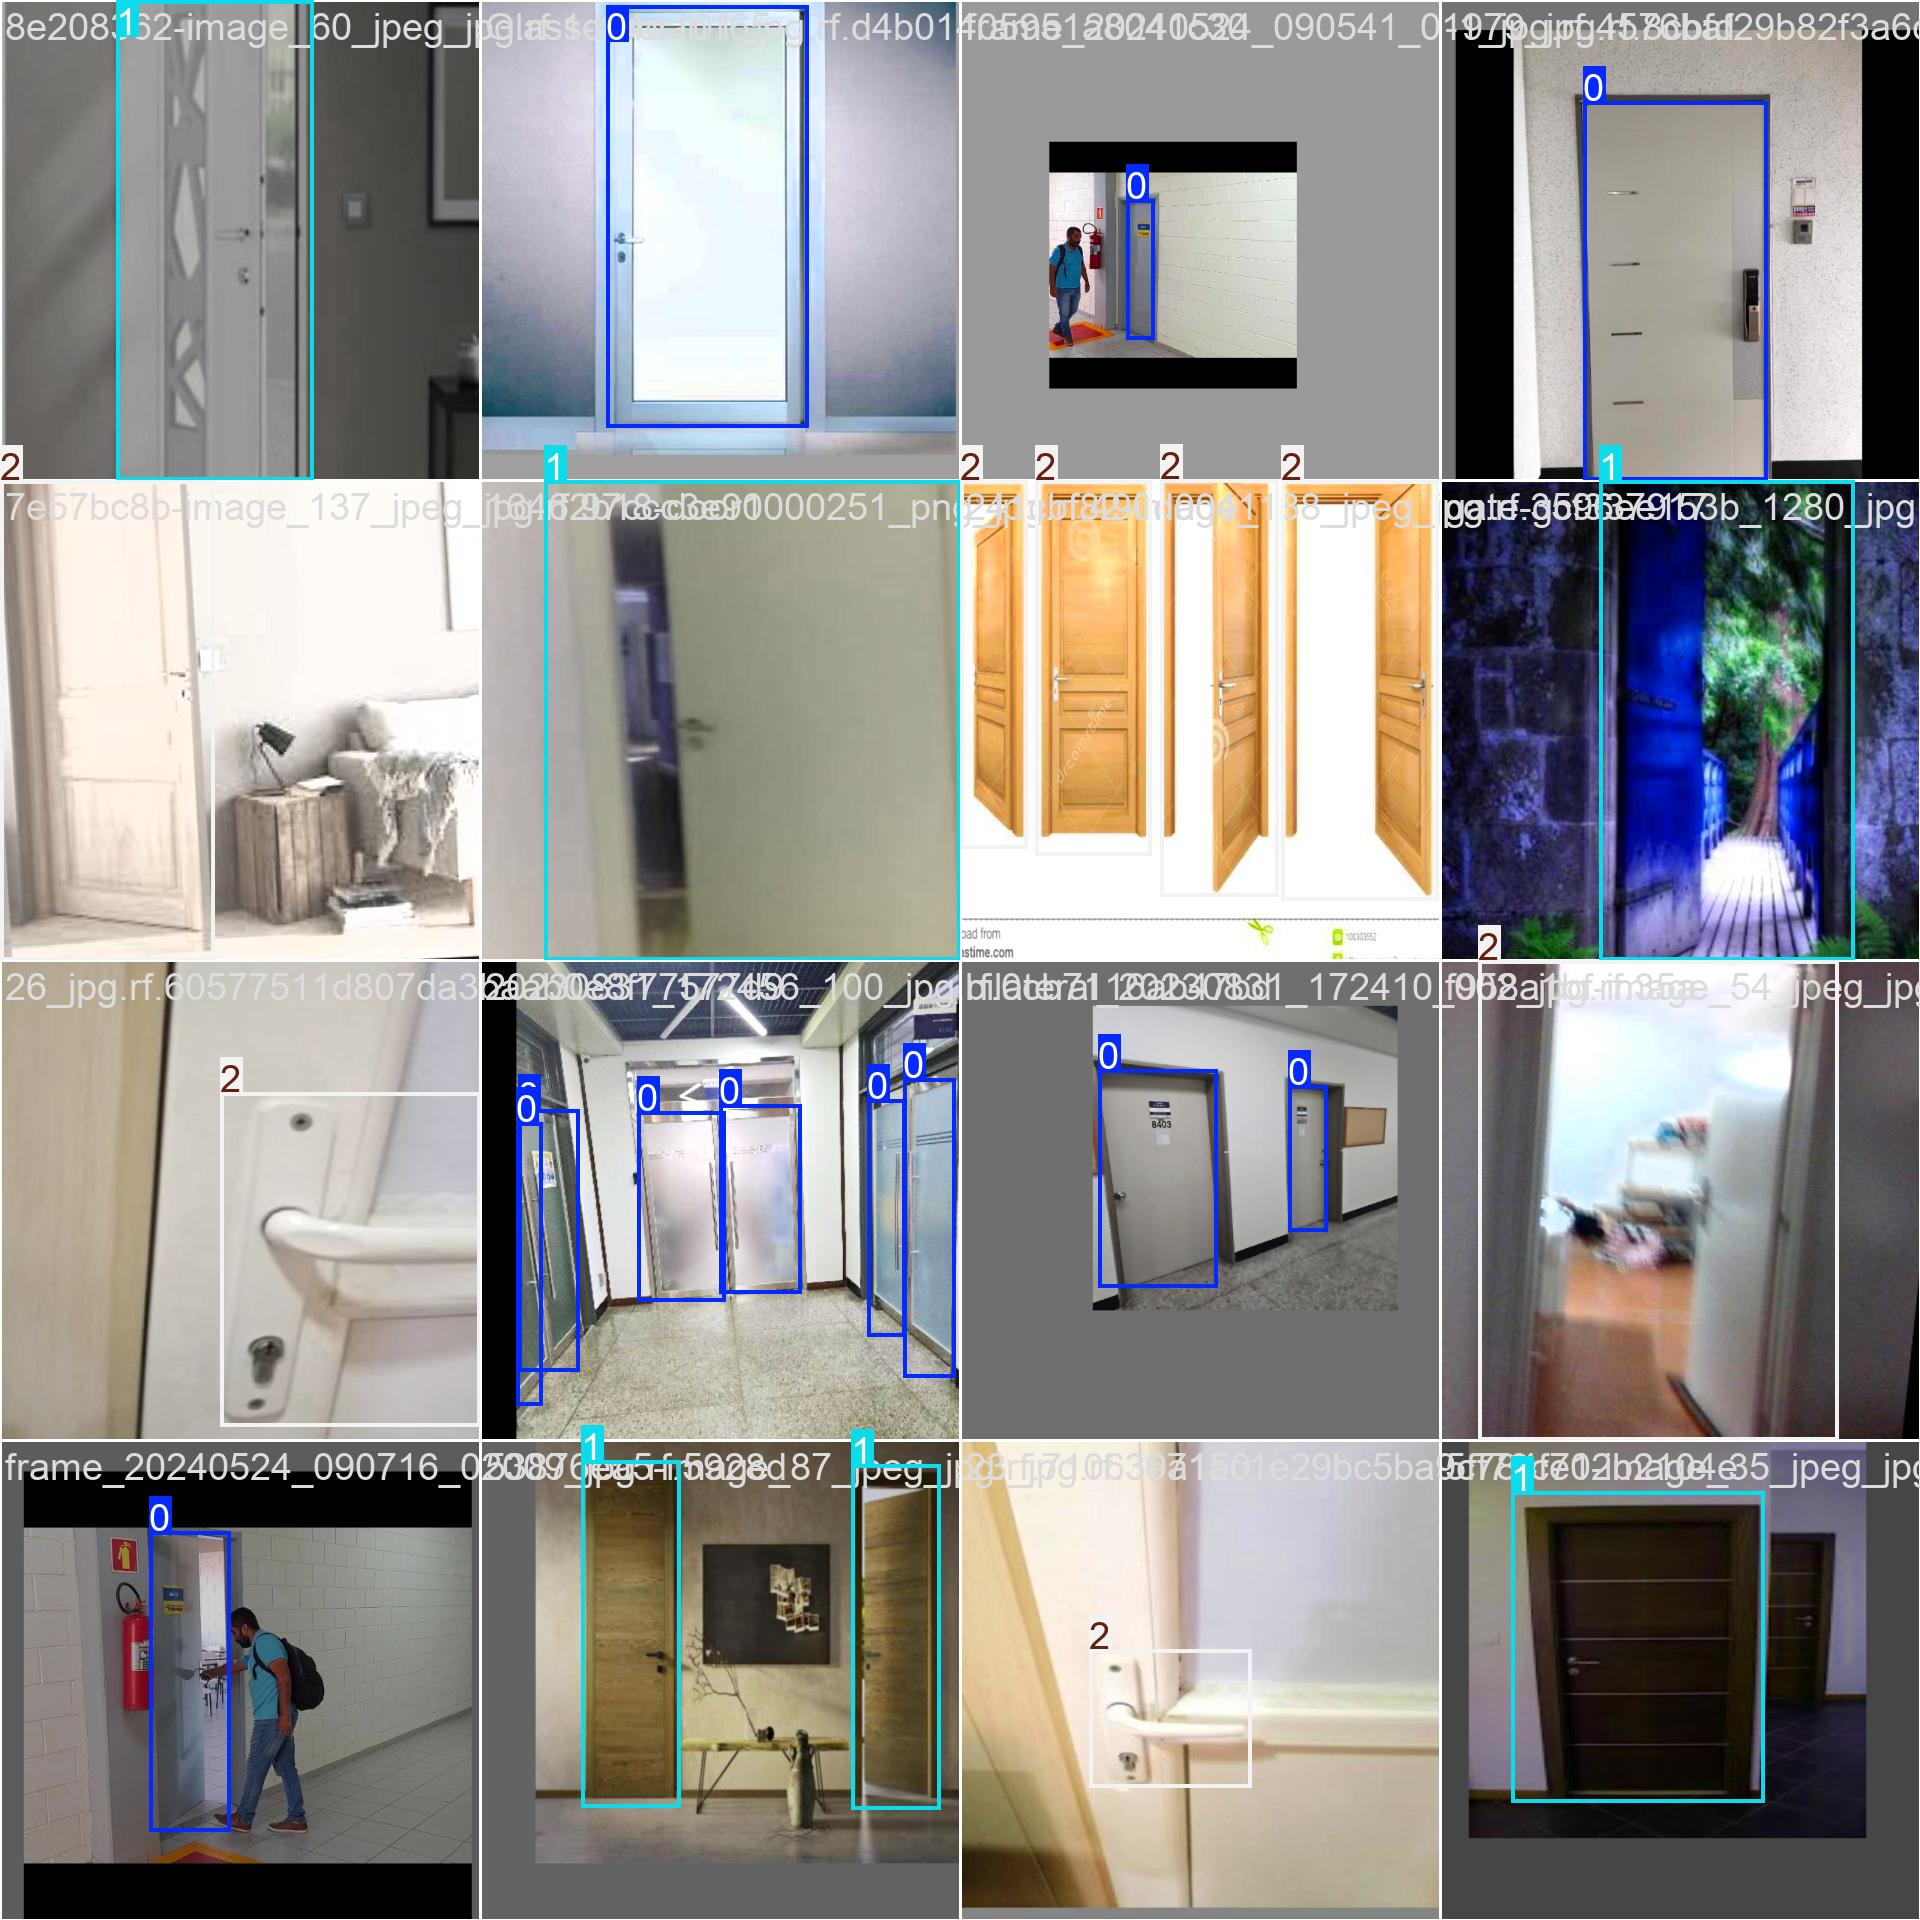

In [ ]:
# Display the train_batch
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\train_batch2162.jpg", width=600)


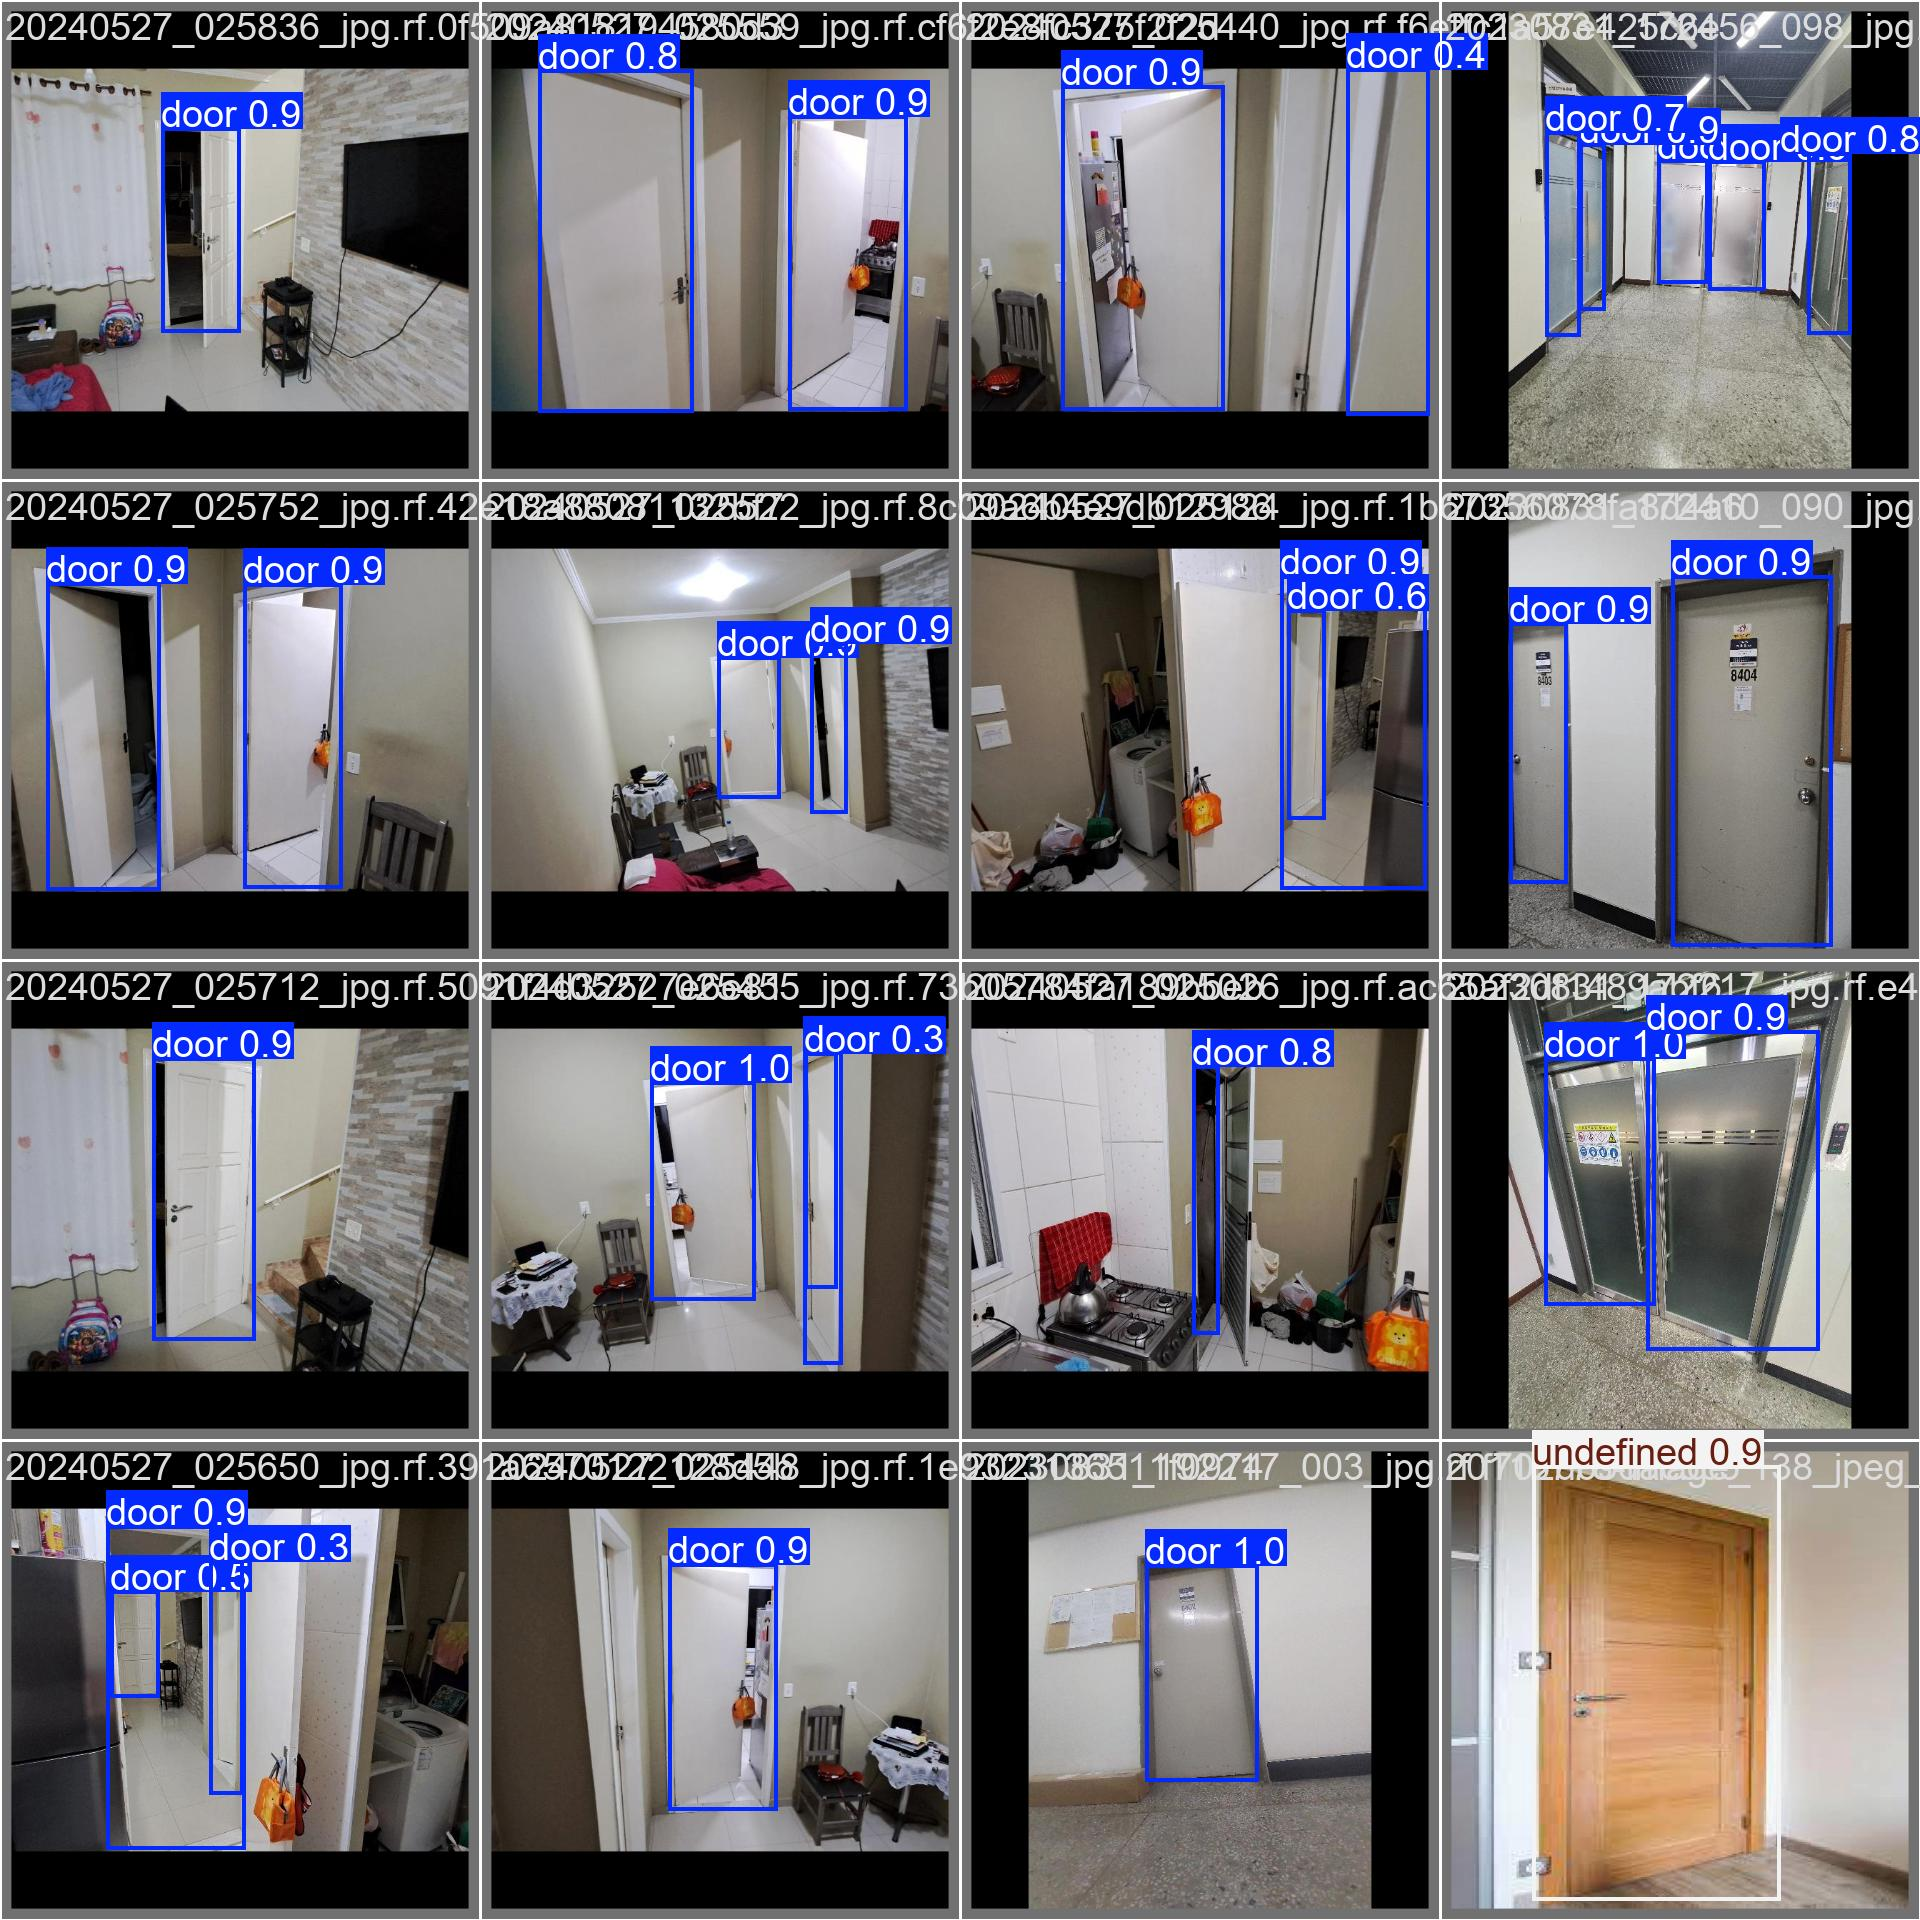

In [ ]:
# Display the train_batch_pred
Image(r"E:\VisionAIry\YOLO\runs\detect\train9\val_batch1_pred.jpg", width=600)
